# Linear regression and Lasso regression

In [2]:
#importing the data 
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
Hitters=pd.read_csv("C:\\Users\\ASUS\\Desktop\\PROJECTS_DS\\Machine-Learning-Projects\\LINEAR REGRESSION\\Hitters.csv")
df=Hitters.copy()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
#getting the general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [4]:
#describing the dataset
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [5]:
#filling the null values
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


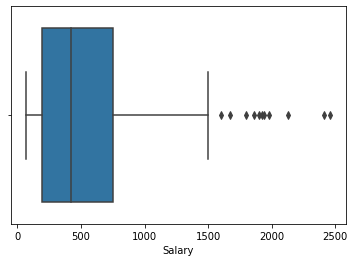

In [7]:
#seeing the outliers in salary coloumn
import seaborn as sns
sns.boxplot(x=df["Salary"]);

In [8]:
NAdf= df[df.isnull().any(axis=1)]
NAdf.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,59.0,279.677966,139.477898,16.0,197.5,249.0,352.5,580.0
Hits,59.0,70.694915,39.994075,2.0,45.5,61.0,94.0,194.0
HmRun,59.0,6.983051,7.449813,0.0,1.5,5.0,9.0,35.0
Runs,59.0,33.813559,20.921425,1.0,20.0,30.0,44.5,91.0
RBI,59.0,32.610169,21.616578,0.0,18.5,29.0,42.5,94.0
Walks,59.0,28.169492,17.935856,0.0,16.0,25.0,37.5,87.0
Years,59.0,8.033898,5.483411,1.0,4.0,7.0,12.0,23.0
CAtBat,59.0,2609.186441,2505.342123,28.0,704.5,1407.0,4333.5,9778.0
CHits,59.0,697.000000,687.099501,4.0,171.0,361.0,1060.0,2732.0
CHmRun,59.0,70.610169,103.269820,0.0,9.5,28.0,66.5,442.0


In [9]:
notNAdf=df[df.notnull().all(axis=1)]
notNAdf.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [13]:
print("New League= A" ,notNAdf[notNAdf["NewLeague"]=="A"].agg({"Salary":"mean"}))
print("New League= N" ,notNAdf[notNAdf["NewLeague"]=="N"].agg({"Salary":"mean"}))
print("League= A" ,notNAdf[notNAdf["League"]=="A"].agg({"Salary":"mean"}))
print("League= N" ,notNAdf[notNAdf["League"]=="N"].agg({"Salary":"mean"}))
print("Division= E" ,notNAdf[notNAdf["Division"]=="E"].agg({"Salary":"mean"}))
print("Division= W" ,notNAdf[notNAdf["Division"]=="W"].agg({"Salary":"mean"}))

New League= A Salary    537.113028
dtype: float64
New League= N Salary    534.553852
dtype: float64
League= A Salary    541.999547
dtype: float64
League= N Salary    529.1175
dtype: float64
Division= E Salary    624.271364
dtype: float64
Division= W Salary    450.876873
dtype: float64


In [14]:
df.head(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N


In [15]:
df.loc[(df["Salary"].isnull())& (df['Division'] == 'E'),"Salary"]=624.27
df.head(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,624.27,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.00,N


In [16]:
df.loc[(df["Salary"].isnull())& (df['Division'] == 'W'),"Salary"]=450.87
df.isnull().sum().sum()

0

In [17]:
df[df["Salary"]<0]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague


In [18]:
#filled the salary coloumn Na values , now lets do encoding using one hot encoding
dff = pd.get_dummies(df, columns = ['League', 'Division', 'NewLeague'], drop_first = True)
dff.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,624.27,False,False,False
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.00,True,True,True
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.00,False,True,False
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.00,True,False,True
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.50,True,False,True


In [19]:
#detect the outliers
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.05)
clf.fit_predict(dff)
dff_scores = clf.negative_outlier_factor_
np.sort(dff_scores)[0:20]

array([-4.72760892, -3.46603588, -2.39248078, -2.31959428, -1.89668479,
       -1.89215368, -1.88689919, -1.85298306, -1.83851027, -1.80132619,
       -1.66642575, -1.64463411, -1.64404063, -1.56696038, -1.54942116,
       -1.51116262, -1.50646388, -1.46830817, -1.46601596, -1.45557139])

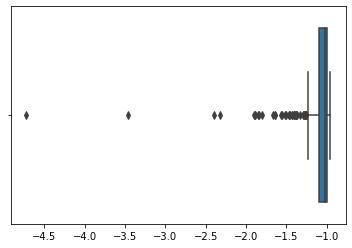

In [20]:
sns.boxplot(x=dff_scores);

In [21]:
threshold = np.sort(dff_scores)[13]
dff.loc[dff_scores < threshold]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.500,True,False,True
22,22,10,1,4,2,1,6,84,26,2,9,9,3,812,84,11,450.870,False,True,False
82,677,238,31,117,113,53,5,2223,737,93,349,401,171,1377,100,6,1975.000,False,False,False
100,495,151,17,61,84,78,10,5624,1679,275,884,1015,709,1045,88,13,2460.000,False,False,False
113,574,152,31,91,101,64,3,985,260,53,148,173,95,1253,111,11,215.000,True,True,True
217,20,1,0,0,0,0,2,41,9,2,6,7,4,78,220,6,2127.333,True,False,True
236,237,52,0,15,25,30,24,14053,4256,160,2165,1314,1566,523,43,6,750.000,True,True,True
249,419,101,18,65,58,92,20,9528,2510,548,1509,1659,1342,0,0,0,487.500,False,True,False
274,522,140,16,73,77,60,4,730,185,22,93,106,86,1320,166,17,200.000,True,False,True
295,19,4,1,2,3,1,1,19,4,1,2,3,1,692,70,8,920.000,True,True,False


In [22]:
dff.loc[(dff_scores < threshold)&(dff["Salary"]>1500)]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
82,677,238,31,117,113,53,5,2223,737,93,349,401,171,1377,100,6,1975.000,False,False,False
100,495,151,17,61,84,78,10,5624,1679,275,884,1015,709,1045,88,13,2460.000,False,False,False
217,20,1,0,0,0,0,2,41,9,2,6,7,4,78,220,6,2127.333,True,False,True


In [23]:
df["Salary"].describe([0.75,0.90,0.95,0.99]).T

count     322.000000
mean      535.419370
std       409.246062
min        67.500000
50%       450.870000
75%       700.000000
90%       996.000000
95%      1300.000000
99%      1967.650000
max      2460.000000
Name: Salary, dtype: float64

In [24]:
dff.loc[(dff_scores < threshold)&(dff["Salary"]>1500),"Salary"]=1967
dff.loc[dff_scores < threshold]


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.50,True,False,True
22,22,10,1,4,2,1,6,84,26,2,9,9,3,812,84,11,450.87,False,True,False
82,677,238,31,117,113,53,5,2223,737,93,349,401,171,1377,100,6,1967.00,False,False,False
100,495,151,17,61,84,78,10,5624,1679,275,884,1015,709,1045,88,13,1967.00,False,False,False
113,574,152,31,91,101,64,3,985,260,53,148,173,95,1253,111,11,215.00,True,True,True
217,20,1,0,0,0,0,2,41,9,2,6,7,4,78,220,6,1967.00,True,False,True
236,237,52,0,15,25,30,24,14053,4256,160,2165,1314,1566,523,43,6,750.00,True,True,True
249,419,101,18,65,58,92,20,9528,2510,548,1509,1659,1342,0,0,0,487.50,False,True,False
274,522,140,16,73,77,60,4,730,185,22,93,106,86,1320,166,17,200.00,True,False,True
295,19,4,1,2,3,1,1,19,4,1,2,3,1,692,70,8,920.00,True,True,False


In [25]:
dff.loc[dff_scores < threshold]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.50,True,False,True
22,22,10,1,4,2,1,6,84,26,2,9,9,3,812,84,11,450.87,False,True,False
82,677,238,31,117,113,53,5,2223,737,93,349,401,171,1377,100,6,1967.00,False,False,False
100,495,151,17,61,84,78,10,5624,1679,275,884,1015,709,1045,88,13,1967.00,False,False,False
113,574,152,31,91,101,64,3,985,260,53,148,173,95,1253,111,11,215.00,True,True,True
217,20,1,0,0,0,0,2,41,9,2,6,7,4,78,220,6,1967.00,True,False,True
236,237,52,0,15,25,30,24,14053,4256,160,2165,1314,1566,523,43,6,750.00,True,True,True
249,419,101,18,65,58,92,20,9528,2510,548,1509,1659,1342,0,0,0,487.50,False,True,False
274,522,140,16,73,77,60,4,730,185,22,93,106,86,1320,166,17,200.00,True,False,True
295,19,4,1,2,3,1,1,19,4,1,2,3,1,692,70,8,920.00,True,True,False


In [28]:
dff.shape

(322, 20)

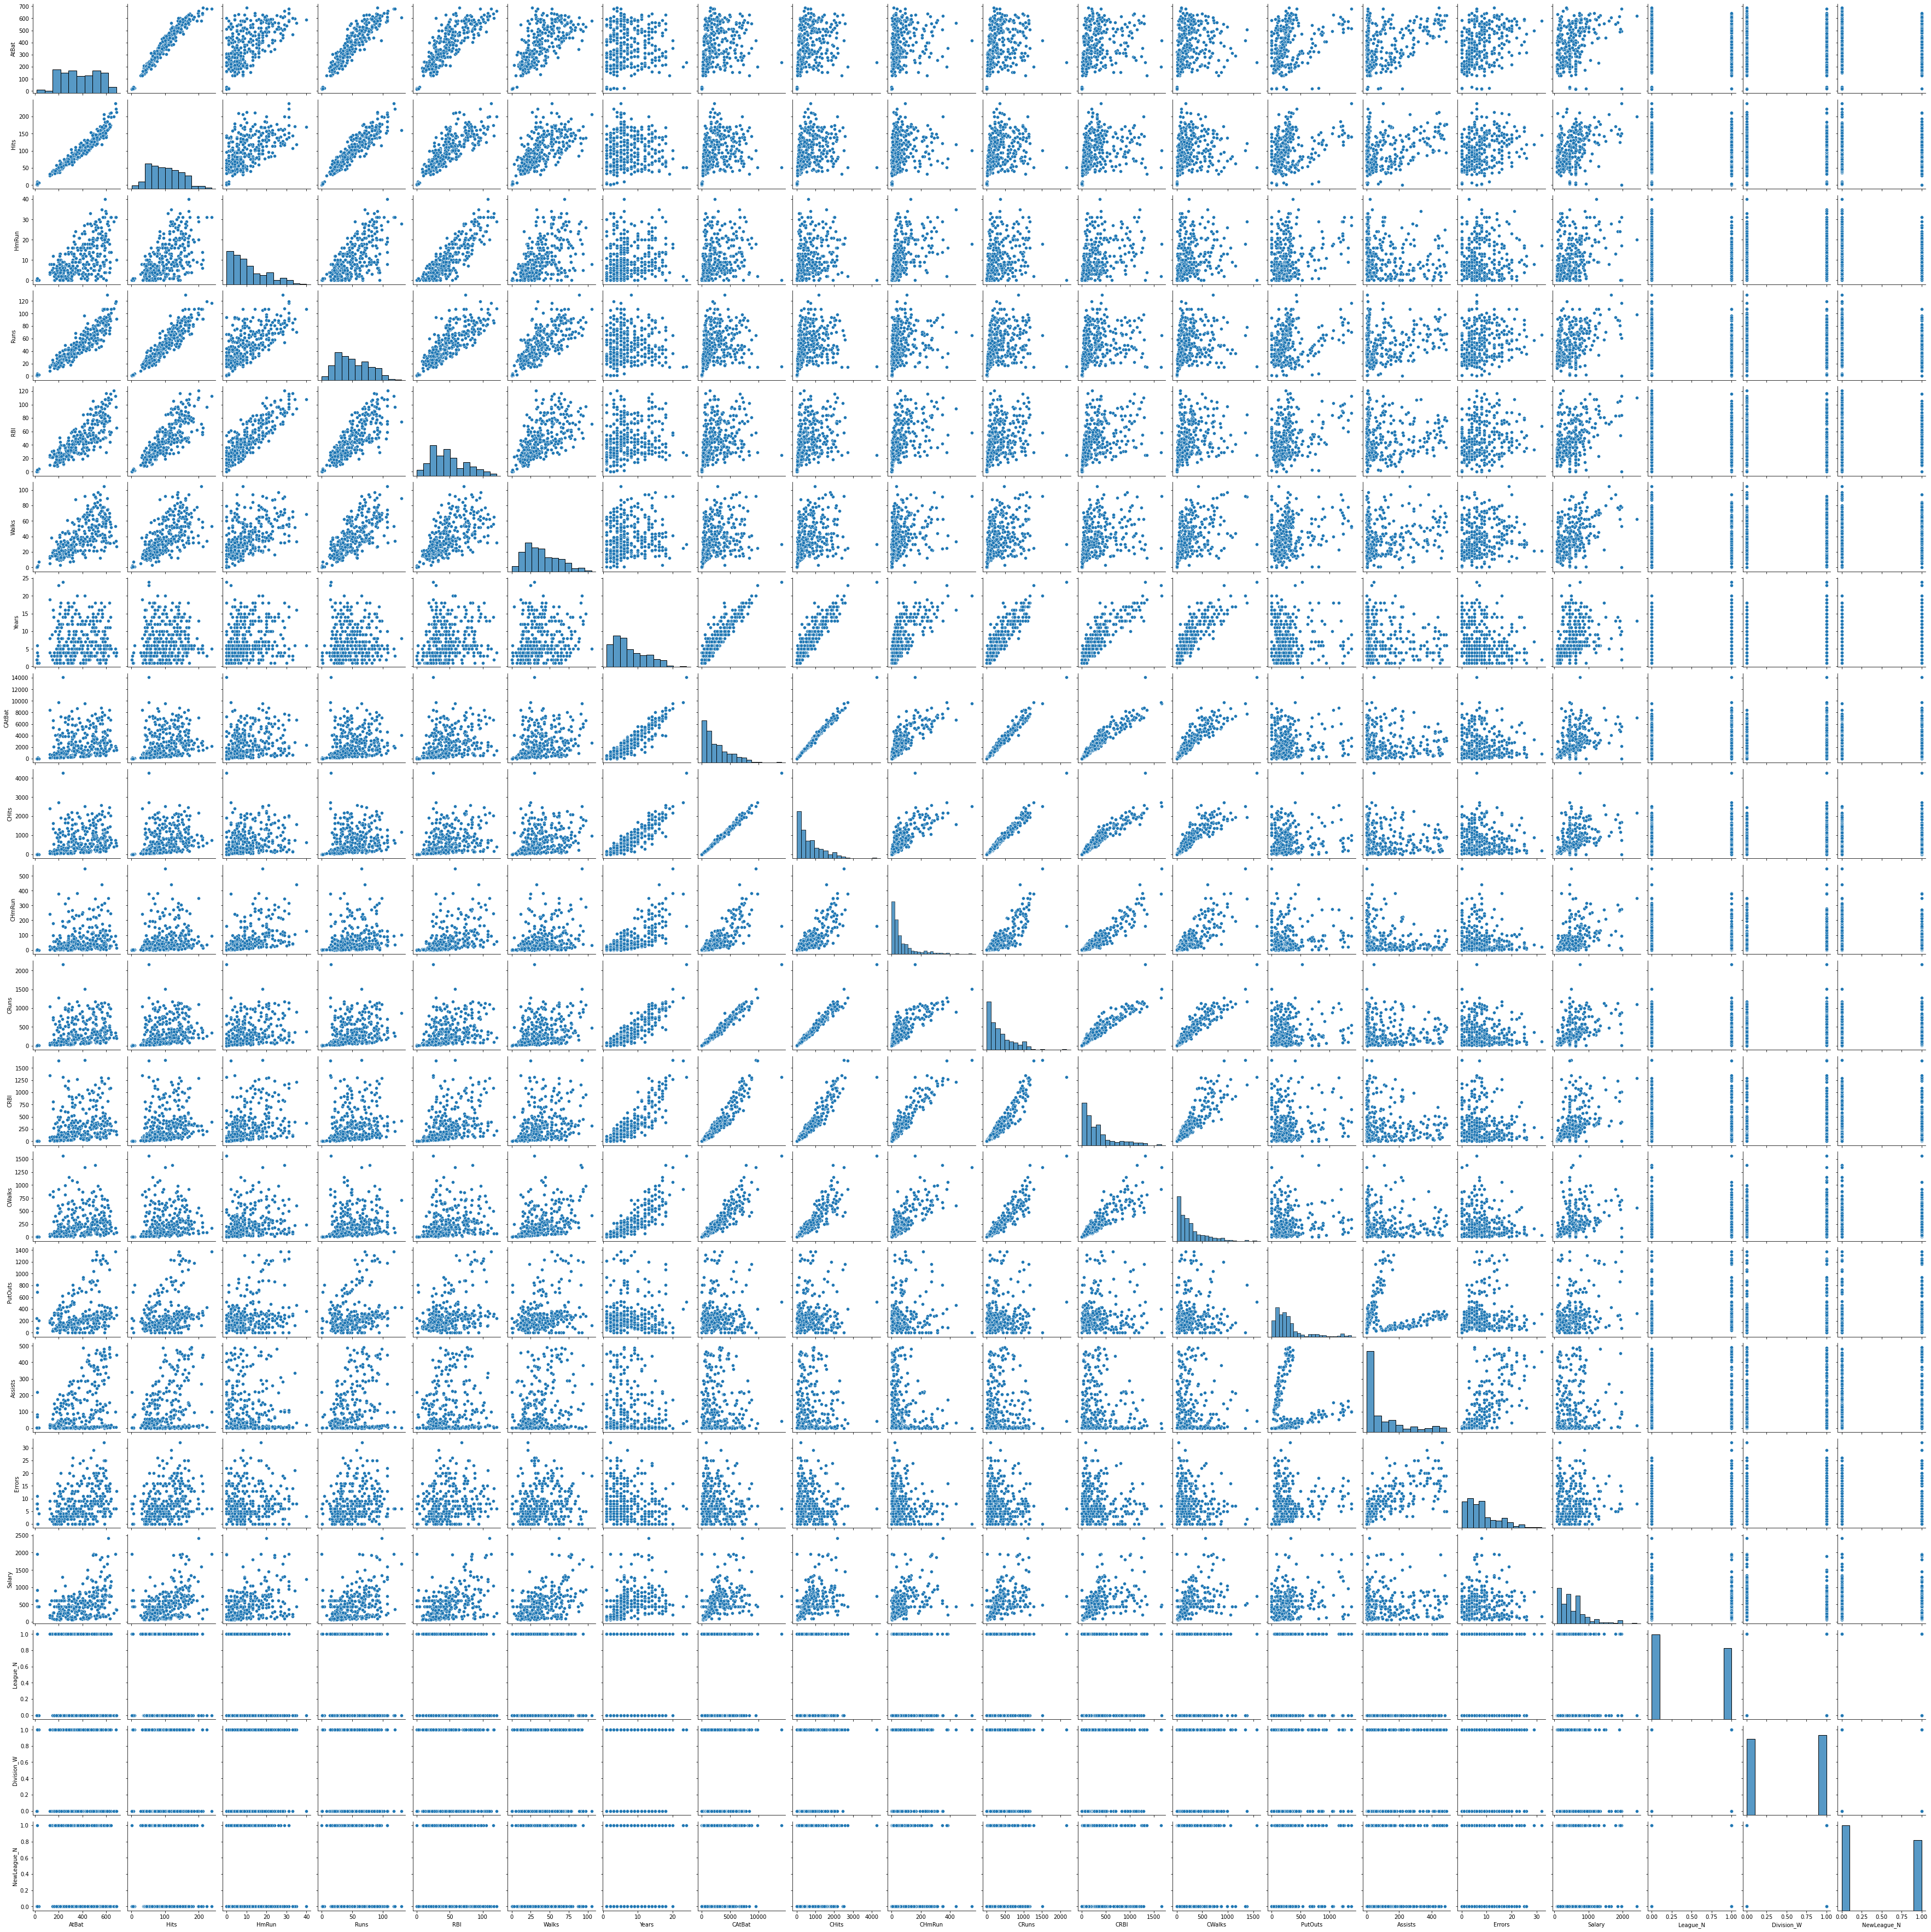

In [29]:
import seaborn as sns
sns.pairplot(dff)

In [31]:
dff.isnull().sum()

AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
PutOuts        0
Assists        0
Errors         0
Salary         0
League_N       0
Division_W     0
NewLeague_N    0
dtype: int64

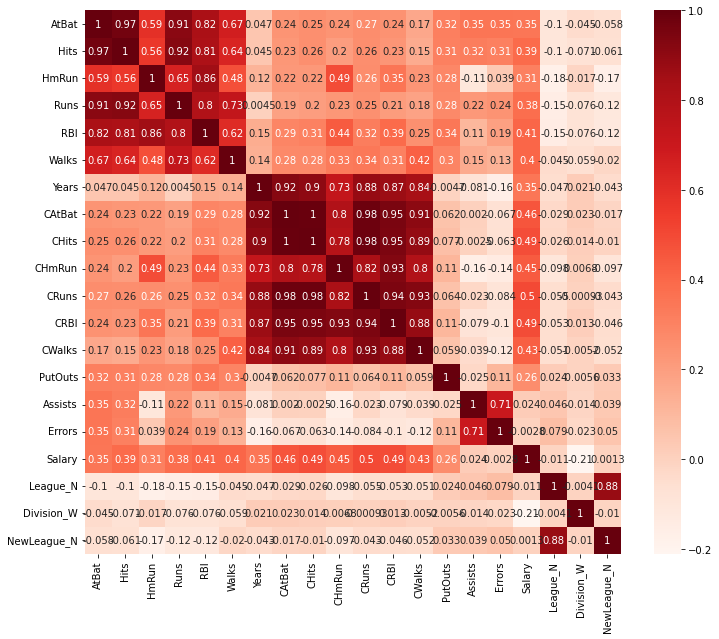

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor = dff.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [33]:
CHits_cor=abs(cor["CHits"])
CHits_relevant_features = CHits_cor[CHits_cor>0.9]
CHits_relevant_features

Years     0.903631
CAtBat    0.995063
CHits     1.000000
CRuns     0.984609
CRBI      0.945141
Name: CHits, dtype: float64

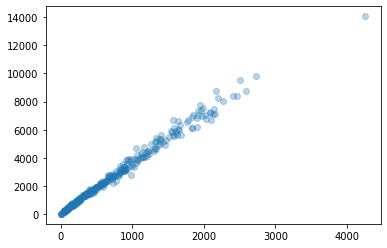

In [34]:
plt.scatter(df["CHits"],df["CAtBat"], alpha=0.3,
            cmap='viridis');

In [35]:
df1=dff.drop("CHits", axis=1)
df1=dff.drop("CAtBat", axis=1)

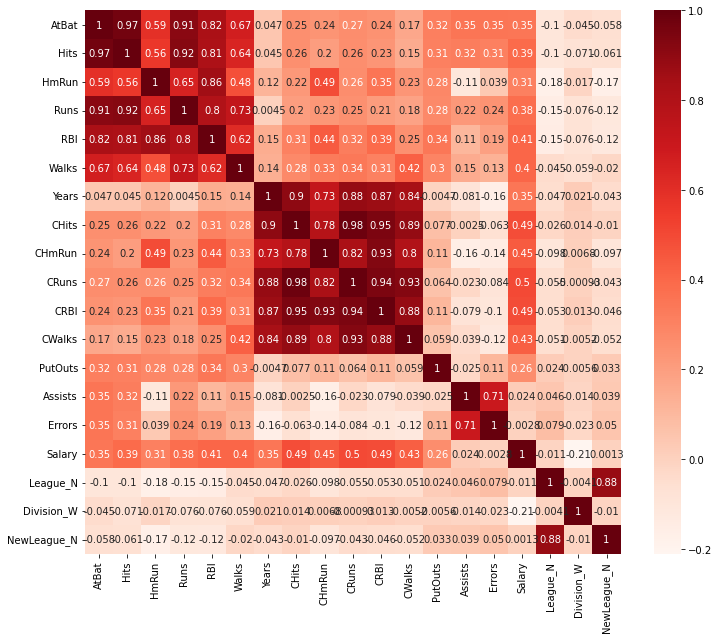

In [36]:
plt.figure(figsize=(12,10))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [37]:
df1=df1.drop("CRBI", axis=1)
df1=df1.drop("CWalks", axis=1)

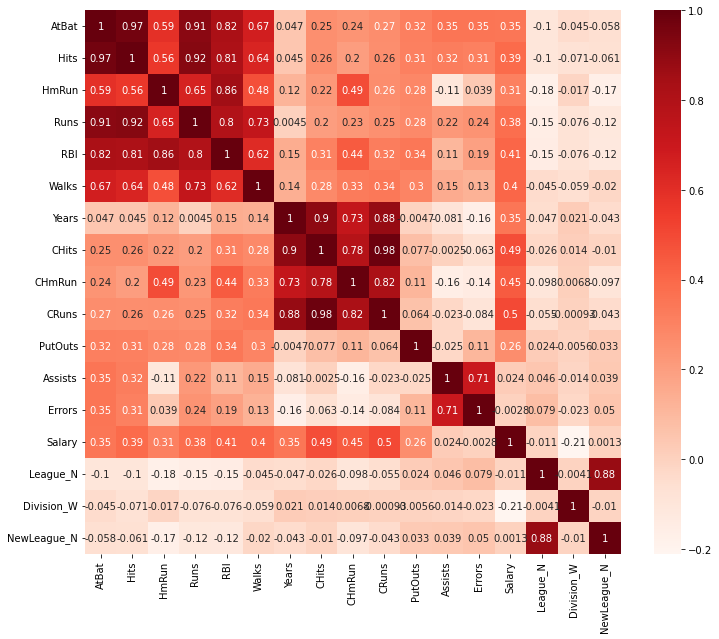

In [38]:
plt.figure(figsize=(12,10))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [39]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.50,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.00,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.00,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.00,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.00,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.00,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.00,11.00,24.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.00,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.50,90.00,548.0
CRuns,322.0,358.795031,334.105886,1.0,100.25,247.00,526.25,2165.0


In [40]:
df1.shape

(322, 17)

In [41]:
#standardscalar
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
SS=StandardScaler()
col=df1.columns
df2=SS.fit_transform(df1)
df3=pd.DataFrame(df2, columns=col)
df3.head(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CHits,CHmRun,CRuns,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,-0.574071,-0.755130,-1.123591,-0.804734,-0.728308,-1.145172,-1.310194,-0.997117,-0.795183,-0.985636,0.560399,-0.540924,1.880899,0.227089,-0.916515,-1.025161,-0.910794
1,-0.430437,-0.431732,-0.433579,-1.035649,-0.383827,0.011930,1.332925,0.179704,-0.005697,-0.113299,1.224048,-0.467740,0.308192,-0.145803,1.091089,0.975456,1.097943


In [42]:
#normalize
df6=preprocessing.normalize(df1, axis=0)
col=df1.columns
df7=pd.DataFrame(df6, columns=col)
df7.head(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CHits,CHmRun,CRuns,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,0.039770,0.033087,0.004026,0.02925,0.029559,0.017588,0.006246,0.003790,0.000504,0.003413,0.061745,0.010600,0.108729,0.052168,0.000000,0.00000,0.000000
1,0.042756,0.040606,0.028181,0.02340,0.038732,0.048995,0.087444,0.047946,0.034745,0.036514,0.087495,0.013812,0.054365,0.039694,0.082479,0.07785,0.082761


In [43]:
#classic regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression

In [44]:
y=df1["Salary"]
X=df1.drop("Salary", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred=reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

323.29592187491437

In [45]:
print("intercept(b0):",reg_model.intercept_)
print("coefficients(b1,b2..):","\n",reg_model.coef_)

intercept(b0): 397.6393545800182
coefficients(b1,b2..): 
 [-2.29869542e+00  6.36501191e+00 -4.16868614e+00  1.64968403e+00
  1.25466442e+00  2.76990745e+00 -2.51495839e+01  2.96435251e-01
  1.54615392e+00  3.65343870e-02  2.24960413e-01  3.10375155e-01
 -1.47423656e+00  2.99093765e+01 -1.46727618e+02 -1.90592036e+01]


In [46]:
reg_model.predict(X)[0:10]

array([ 342.84551284,  373.97423756,  680.36995384, 1002.36812281,
        570.36776353,  491.65742537,  350.76321697,  179.49250275,
        194.84537157,  821.98934333])

In [47]:
y.head(10)

0     624.27
1     475.00
2     480.00
3     500.00
4      91.50
5     750.00
6      70.00
7     100.00
8      75.00
9    1100.00
Name: Salary, dtype: float64

In [48]:
df1[y<0]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CHits,CHmRun,CRuns,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N


In [49]:
# df3 (Standar Scaler)

y=df3["Salary"]
X=df3.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred=reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.8076274975859532

In [50]:
#df7 (Normalize)

y=df7["Salary"]
X=df7.drop("Salary", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred=reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.02701644660396439

### LASSO REGRESSION

In [53]:
y=df1["Salary"]
X=df1.drop("Salary", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                   random_state=46)
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV, LassoCV

In [54]:
lasso_model = Lasso().fit(X_train, y_train)
y_pred=lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

322.83169983104267

In [55]:
alphas1 = np.random.randint(0,1000,100)
alphas2 = 10**np.linspace(10,-2,100)*0.5
alphas3 = np.linspace(0,1,1000)
lasso_cv_model = LassoCV(alphas = alphas1, cv = 10).fit(X_train, y_train)

In [56]:
print(lasso_cv_model.alpha_)

8


In [57]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

323.0121045166057